In [ ]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import imutils

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Digital Image Processing/HW9/ComputerDepartment.jpg')
print(img.shape)

(600, 800, 3)


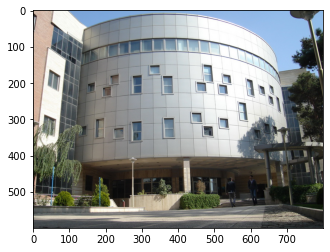

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

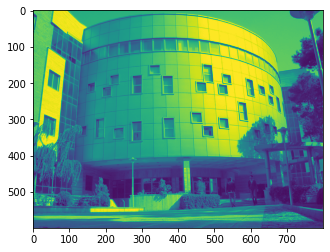

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

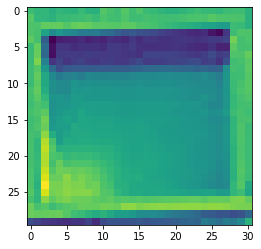

In [ ]:
template = cv2.imread('/content/drive/MyDrive/Digital Image Processing/HW9/window.jpg', 0)
# template2 = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# print(template2.shape)
# plt.imshow(template2)
plt.imshow(template)

In [ ]:
def non_max_suppression(boxes, overlapThresh=0.5):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# initialize the list of picked indexes
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
  # keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list, add the index
		# value to the list of picked indexes, then initialize
		# the suppression list (i.e. indexes that will be deleted)
		# using the last index
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		suppress = [last]
    # loop over all indexes in the indexes list
		for pos in range(0, last):
			# grab the current index
			j = idxs[pos]
			# find the largest (x, y) coordinates for the start of
			# the bounding box and the smallest (x, y) coordinates
			# for the end of the bounding box
			xx1 = max(x1[i], x1[j])
			yy1 = max(y1[i], y1[j])
			xx2 = min(x2[i], x2[j])
			yy2 = min(y2[i], y2[j])
			# compute the width and height of the bounding box
			w = max(0, xx2 - xx1 + 1)
			h = max(0, yy2 - yy1 + 1)
			# compute the ratio of overlap between the computed
			# bounding box and the bounding box in the area list
			overlap = float(w * h) / area[j]
			# if there is sufficient overlap, suppress the
			# current bounding box
			if overlap > overlapThresh:
				suppress.append(pos)
		# delete all indexes from the index list that are in the
		# suppression list
		idxs = np.delete(idxs, suppress)
	# return only the bounding boxes that were picked
	return boxes[pick]

[INFO] 17 matched locations *after* NMS


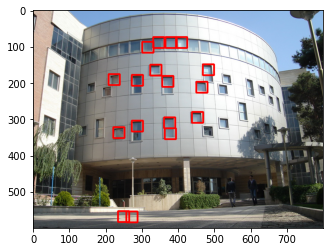

In [ ]:
# for scale in np.linspace(0.6, 3.0, 30)[::-1]:
#   # resized = imutils.resize(template, width = int(template.shape[1] * scale), height=int(template.shape[0] * scale))
#   resized = imutils.resize(template, width=int(template.shape[1] * scale))

tW, tH = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.54
(yCoords, xCoords) = np.where(res >= threshold)
# initialize our list of rectangles
rects = []
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
  # update our list of rectangles
  rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects), 0.3)
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
for (startX, startY, endX, endY) in pick:
  # draw the bounding box on the image
  cv2.rectangle(img2, (startX, startY), (endX, endY),
  (255, 0, 0), 3)
  # if loc:
  #   for pt in zip(*loc[::-1]):
  #     cv2.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)

plt.imshow(img2)